In [3]:
import numpy as np

### 스핀 행렬

In [4]:
def mat(L):
    data = np.random.choice([-1, 1], size=(L, L)) # -1과 1 중에서 무작위로 LxL 개 뽑음
    return data

In [5]:
# 코드 작성에 활용할 연습용 데이터 a
a = mat(5)
print(a)

[[ 1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1]
 [-1 -1  1  1  1]
 [ 1  1  1 -1 -1]
 [-1  1 -1  1 -1]]


### 각 노드의 이웃 노드

In [6]:
def neighbor(array, n): # n번째 노드의 이웃 노드 인덱스(상하좌우 4개)를 찾음
    L, _ = array.shape

    # 상
    up = n-L # 윗쪽으로 한 칸 이동
    if up < 0: # 이동 전이 맨 윗쪽 열인 경우,
        up += L*L # 아랫쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 하
    down = n+L # 아랫쪽으로 한 칸 이동
    if down >= L*L: # 이동 전이 맨 아랫쪽 열인 경우,
        down -= L*L # 윗쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 좌
    left = n-1 # 왼쪽으로 한 칸 이동
    if (left+1)%L == 0: # 이동 전이 맨 왼쪽 열인 경우,
        left += L # 오른쪽으로 L칸 이동(= 아래로 한 칸 이동)하여 주기적 경계 조건 만족
    # 우
    right = n+1 # 오른쪽으로 한 칸 이동
    if right%L == 0: # 이동 후가 맨 왼쪽 열(= 이동 전이 맨 오른쪽 열)인 경우,
        right -= L # 왼쪽으로 L칸 이동(= 위로 한 칸 이동)하여 주기적 경계 조건 만족

    return [up, down, left, right] # 이웃 노드의 인덱스 리스트(상하좌우 순) 출력

In [7]:
neighbor(a, 9) # 5x5 행렬 9번 노드의 이웃: [4, 14, 8, 5]

[4, 14, 8, 5]

### 각 노드의 에너지

In [8]:
def nb_energy(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        if array_list[n] == array_list[i]: # n번째 노드와 이웃 노드가 같은 스핀일 경우
            e -= 1 # -1을 sum
        else: # 다른 스핀일 경우
            e += 1 # +1을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

In [9]:
nb_energy(a, 9) # 5x5 행렬 9번 노드의 에너지

0

### 행렬의 총 에너지

In [10]:
def E(array):
    N = len(array)**2 # N = L x L
    result = []

    for i in range(0,N): # 0~(N-1)번째 노드를 반복하여
        result.append(nb_energy(array, i)) # 각 노드의 총 에너지를 저장

    return sum(result)/2 # 각 노드의 총 에너지를 모두 더한 후, (a,b)와 (b,a)의 중복 제거를 위해 2로 나누어 반환

In [11]:
E(a)

6.0

### 새로운 데이터로 테스트

In [12]:
test = mat(5)
print(test)
E(test)

[[ 1  1  1 -1 -1]
 [-1 -1 -1  1  1]
 [ 1  1  1 -1  1]
 [-1  1 -1 -1 -1]
 [-1 -1  1 -1  1]]


10.0

### (0514) 이웃 노드들의 스핀 합

In [13]:
def nb_sig(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        e += array_list[i] # 이웃 노드들의 스핀을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

In [14]:
nb_sig(a, 9)

0

### (0514) Metropolis

In [15]:
import random
import copy
import matplotlib.pyplot as plt

In [22]:
def func(array, count, beta=1):
    mu = array # mu 초기화
    exps = [np.exp(-4*beta), np.exp(-8*beta)] # exp 계산을 한 번만
    E_list = []
    delta_list = []

    for _ in range(count):
        mu_list = [item for sublist in copy.copy(mu) for item in sublist] # 행렬을 하나의 리스트로
        k = random.randint(0, len(mu_list)-1) # 무작위로 인덱스를 뽑음 0~N

        delta = 2 * mu_list[k] * nb_sig(mu,k) # delta E = 2 * 해당 노드 스핀 * 이웃 노드 스핀 합

        if delta <= 0:
            mu_list[k] = -mu_list[k]
        elif delta == 4 and np.random.uniform(0,1) <= exps[0]:
            mu_list[k] = -mu_list[k]
        elif delta == 8 and np.random.uniform(0,1) <= exps[1]:
            mu_list[k] = -mu_list[k]

        mu = np.array(mu_list).reshape((len(array), len(array))) # flip 된 스핀을 포함한 새로운 mu

        E_list.append(E(mu))
        delta_list.append(delta)

    return E_list, delta_list

[2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -14.0, -14.0, -18.0, -18.0, -18.0, -18.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -22.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -30.0, -30.0, -30.0, -30.0, -30.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -42.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, -50.0, 

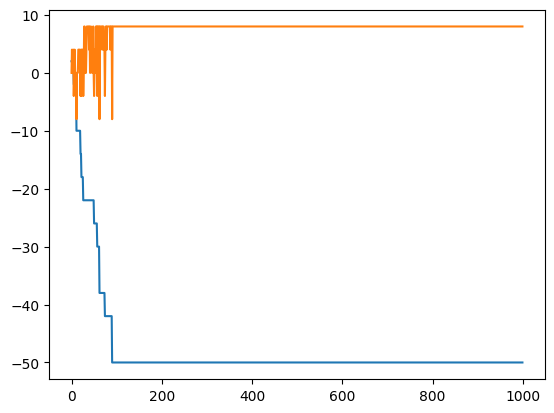

In [30]:
# beta = 1
E1, delta1 = func(mat(5), 1000)
print(E1, '\n', delta1)

plt.plot(E1)
plt.plot(delta1)

[6.0, 10.0, 6.0, 6.0, 10.0, 6.0, 2.0, -2.0, -2.0, 2.0, 6.0, 10.0, 10.0, 6.0, 2.0, -2.0, -2.0, 2.0, 6.0, 6.0, 10.0, 6.0, 6.0, -2.0, -6.0, -2.0, -2.0, -2.0, 2.0, -2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -6.0, -6.0, 2.0, 2.0, -6.0, -6.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 6.0, 6.0, 10.0, 18.0, 10.0, 2.0, 10.0, 10.0, 6.0, 2.0, 6.0, -2.0, 2.0, 6.0, 2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -6.0, -6.0, -10.0, -14.0, -14.0, -10.0, -10.0, -10.0, -6.0, -6.0, -2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 10.0, 6.0, 10.0, 2.0, -2.0, -2.0, -6.0, -2.0, -2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -6.0, -2.0, -6.0, -6.0, -10.0, -10.0, -6.0, -10.0, -14.0, -10.0, -6.0, -2.0, 2.0, 2.0, -2.0, -2.0, -6.0, -2.0, -6.0, -2.0, -6.0, -2.0, -6.0, -6.0, -2.0, 2.0, -2.0, -6.0, -6.0, -6.0, -2.0, -2.0, -6.0, -6.0, -2.0, 2.0, 2.0, 6.0, 10.0, 2.0, -2.0, -2.0, -2.0, -2.0, 2.0, 6.0, 6.0, 6.0, 6.0, 6.0, 2.0, 2.0, 6.0, 2.0, 2.0, 6.0, 6.0, 2.0, -2.0, 2.0, 6.0, 2.0, -6.0, -6.0, -10.0, -10.0, -10.0, -2.0, -2.0, 2.0, 2.0, -2.0, 

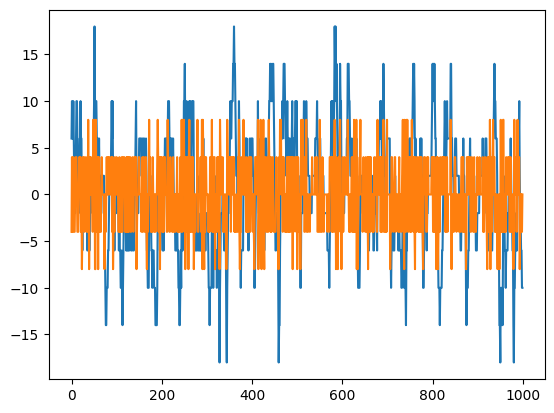

In [31]:
# beta = 0
E0, delta0 = func(mat(5), 1000, 0)
print(E0, '\n', delta0)

plt.plot(E0)
plt.plot(delta0)

[0.0632, -5.55, -10.796, -19.7396, -34.936, -43.0084, -47.5528, -48.8776, -49.3444, -49.6352, -49.5372] 
 [0.002, 0.8568, 1.786, 3.148, 5.6176, 6.874, 7.614, 7.8204, 7.9084, 7.9392, 7.9356]


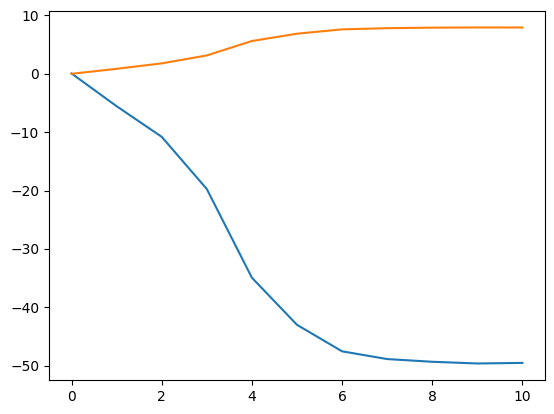

In [36]:
avg_Es = []
avg_deltas = []

for i in range(0,11):
    e, d = func(mat(5), 10000, beta=0.1*i)
    avg_Es.append(np.mean(e))
    avg_deltas.append(abs(np.mean(d)))

print(avg_Es, '\n', avg_deltas)

plt.plot(avg_Es)
plt.plot(avg_deltas)